In [39]:
import pandas as pd
import csv
import numpy as np


Explore data distribution

<Figure size 720x432 with 0 Axes>

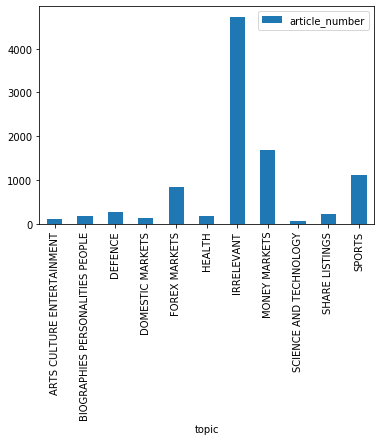

In [40]:
import matplotlib.pyplot as plt

df=pd.read_csv('training.csv')

fig = plt.figure(figsize=(10,6))
df_graph = df[['topic','article_number']]
df_graph.groupby('topic').count().plot.bar(ylim=0)

plt.show()

Transforming training set words to features with TF-IDF values

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

#give each word a tf-idf value
train_features = vectorizer.fit_transform(df['article_words'])

print(train_features.shape)

y_train = df['topic']


(9500, 35822)


Transforming test set words to features with TF-IDF values

In [42]:
df_test=pd.read_csv('test.csv')

#give each word a tf-idf value
test_features = vectorizer.transform(df_test['article_words'])

print(test_features.shape)

y_test = df_test['topic']


(500, 35822)


Run ML algos

Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

LGR_clf = LogisticRegression(random_state=0)
LGR_clf.fit(train_features, y_train)

LGR_prediction_test = LGR_clf.predict(test_features)
print('test data accuracy: {}'.format(np.mean(LGR_prediction_test == y_test)))

LGR_prediction_train = LGR_clf.predict(train_features)
print('train data accuracy: {}'.format(np.mean(LGR_prediction_train == y_train)))

C:\Users\jingj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jingj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


test data accuracy: 0.746
train data accuracy: 0.8117894736842105


Naive Bayes Rule

In [32]:
from sklearn.naive_bayes import MultinomialNB
NBclf = MultinomialNB()

NBclf.fit(train_features, y_train)

NBpredictions_test = NBclf.predict(test_features)

print('test data accuracy: {}'.format(np.mean(NBpredictions_test == y_test)))

NBpredictions_train = NBclf.predict(train_features)

print('train data accuracy: {}'.format(np.mean(NBpredictions_train == y_train)))


test data accuracy: 0.68
train data accuracy: 0.6817894736842105


Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

RFclf = RandomForestClassifier(n_estimators=10)


RFclf.fit(train_features, y_train)

RFpredictions_test = RFclf.predict(test_features)

print('test data accuracy: {}'.format(np.mean(RFpredictions_test == y_test)))

RFpredictions_train = RFclf.predict(train_features)

print('train data accuracy: {}'.format(np.mean(RFpredictions_train == y_train)))


RFclf1 = RandomForestClassifier(n_estimators=100)
RFclf1.fit(train_features, y_train)


RFpredictions1_test = RFclf1.predict(test_features)
print('test data accuracy: {}'.format(np.mean(RFpredictions1_test == y_test)))

RFpredictions1_train = RFclf1.predict(train_features)
print('train data accuracy: {}'.format(np.mean(RFpredictions1_train == y_train)))



test data accuracy: 0.73
train data accuracy: 0.9792631578947368
test data accuracy: 0.726
train data accuracy: 0.9889473684210527


SVM

In [34]:
from sklearn.svm import SVC

SVM_clf = SVC(kernel='linear')
SVM_clf.fit(train_features, y_train)


SVMpredictions_test = SVM_clf.predict(test_features)
print('test data accuracy: {}'.format(np.mean(SVMpredictions_test == y_test)))
      
SVMpredictions_train = SVM_clf.predict(train_features)
print('train data accuracy: {}'.format(np.mean(SVMpredictions_train == y_train)))


test data accuracy: 0.768
train data accuracy: 0.8988421052631579
